##Nama : Ali Mubarak
##Nim : 09011181823011
##Kelas : SK5A Indralaya
##UAS Artificial Intelligence

#Analisis Data Pengguna iklan (ads) menggunakan metode Support Vector Machine

Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import dataset

In [ ]:
datasets = pd.read_csv('dataset.csv')
datasets.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Melakukan splitting (pembagian) dataset untuk melakukan training dan testing

In [ ]:
from sklearn.model_selection import train_test_split
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Fitur Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

Menyesuaikan classifier ke dalam training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Membuat prediksi hasil dari test set

In [ ]:
Y_Pred = classifier.predict(X_Test)

Melakukan Training set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


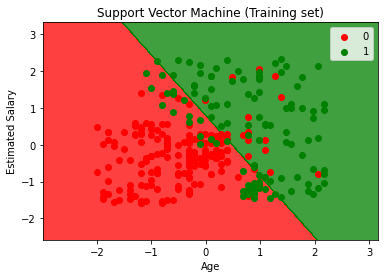

In [ ]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Melakukan Testing set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


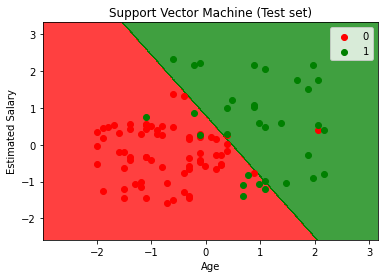

In [ ]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Memberikan tanda dari dataset umur dan Estimated Salary

*   b = merupakan deskripsi dari warna merah, digunakan untuk memberi tanda bahwa jenis kelaminnya laki-laki
*   r = merupakan deskripsi dari warna biru, digunakan untuk memberi tanda bahwa jenis kelaminnya perempuan



Text(0, 0.5, 'EstimatedSalary')

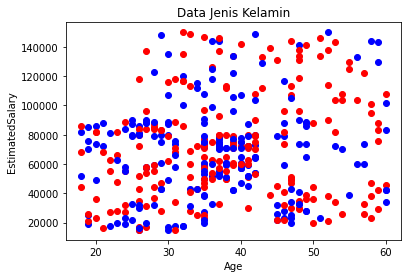

In [ ]:
#Warna
colors={'Female':'r','Male':'b'}
#figure dan axis
fig, ax =plt.subplots()
#plot data
for i in range(len(datasets['Age'])):
  ax.scatter (datasets['Age'][i],datasets['EstimatedSalary'][i],color=colors[datasets['Gender'][i]])
#set label
ax.set_title('Data Jenis Kelamin')
ax.set_xlabel('Age')
ax.set_ylabel('EstimatedSalary')

Menampilkan grafik histogram dan Frekuensi dari Estimated Salary

Text(0, 0.5, 'Frequency')

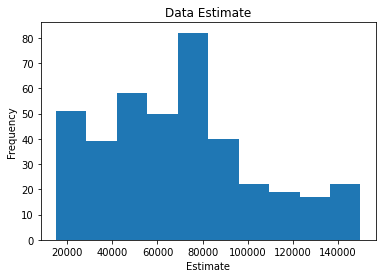

In [ ]:
#figure dan axis
fig, ax = plt.subplots()
#plot histogram
ax.hist(datasets['EstimatedSalary'])
#set title dan label
ax.set_title('Data Estimate')
ax.set_xlabel('Estimate')
ax.set_ylabel('Frequency')

Membuat Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
print(cm)

precision = tp / ( tp + fp)
recall = tp/(tp+fn)
spesifisitas = tn / (tn+fp)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
all_hasil = [recall,precision,spesifisitas,akurasi,f1]

print ("presisi : ",precision*100)
print ("spesifisitas : ",spesifisitas*100)
print("recall : ",recall*100)
print ("F1 : ",f1*100)
print("akurasi : ",akurasi*100)

[[66  2]
 [ 8 24]]
presisi :  97.05882352941177
spesifisitas :  92.3076923076923
recall :  89.1891891891892
F1 :  92.95774647887325
akurasi :  90.0


Nilai Akurasi = 90%

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_Test, Y_Pred))

0.9


##REFERENSI
https://github.com/shivang98/Social-Network-ads-Boost
https://github.com/sharmaroshan/Social-Networks-Ads
https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee